In [1]:
# Библиотеки
# Реализация всех структур
import numpy as np

# Датасеты для первичной проверки качества моделей
from sklearn.datasets import make_blobs, make_circles
# classification_report
from sklearn.metrics import classification_report

# Графики и визуализация
from matplotlib import pyplot as plt

# Распаковка CIFAR-10
import pickle

# Для отображения структуры скачанных данных
import glob

# Чтобы засекать время работы алгоритма
import time

# Чтобы перезагружать библиотеку
import importlib

import sys
import os


# sys.path.append("/Users/somov-od/Documents/Teaching/DL/notebooks/Numpy Network/Numpy_NN/src")
sys.path.append(os.path.join(os.getcwd(), "src"))

from dataset.dataloader import Dataloader
from nn.module.sequential import Sequential
from nn.layers.linear import Linear
from nn.layers.batch_norm import BatchNorm
from nn.activations.relu import ReLU
from optimization.adam_optimizer import Adam
from optimization.gd_optimizer import GD
from nn.loss_functions.mse_loss import mse_loss
import visualization_utils as viz_utils

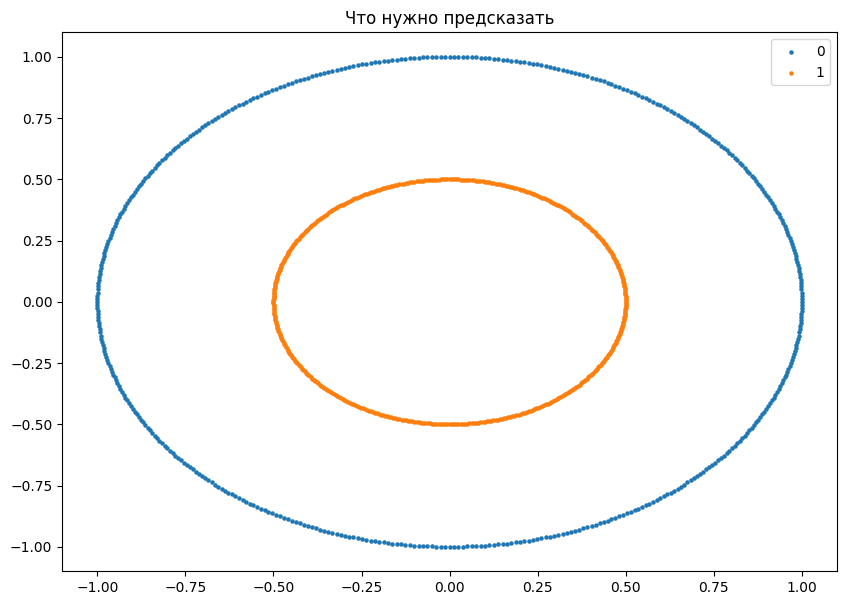

In [2]:
# Установим seed для воспроизводимости
np.random.seed(42)
dataset = make_circles(1000, factor=0.5, random_state=42)

X = dataset[0]
y = dataset[1]

plt.figure(figsize=(10, 7))

colors = ('tab:blue', 'tab:orange')

for ind, cls in enumerate(sorted(set(y))):
    plt.scatter(X[y == cls][:, 0], X[y == cls][:, 1], s=5, 
                label=str(cls), c=colors[ind])

plt.title('Что нужно предсказать')
plt.legend()
plt.show()

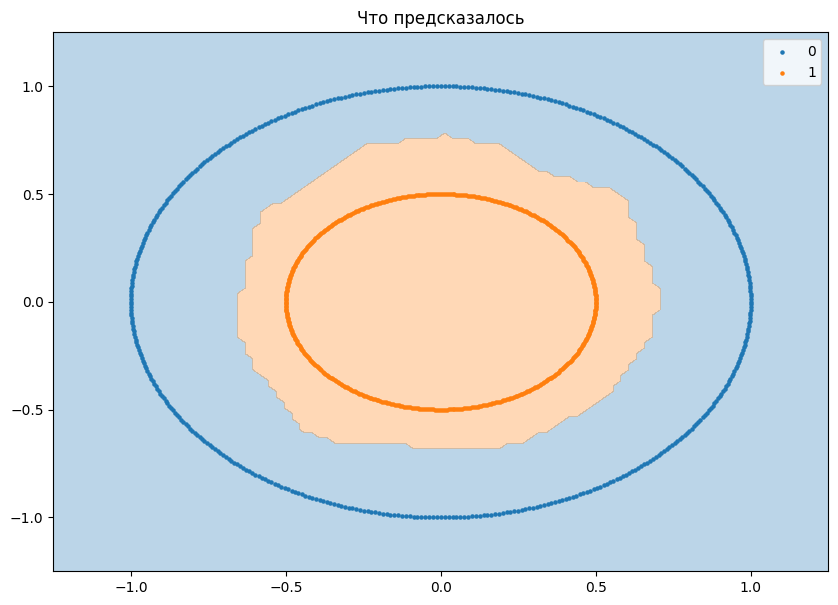

In [3]:
np.random.seed(42)
dataset = make_circles(1000, factor=0.5, random_state=42)

X = dataset[0]
y = dataset[1]

model = Sequential(
    Linear(2, 20),
    ReLU(),
    Linear(20, 10),
    ReLU(),
    Linear(10, 4),
    ReLU(),
    Linear(4, 1)
)

optimizer = Adam(model.parameters(), 0.01)

for epoch in range(100):
    out = model.forward(X)

    loss = mse_loss(out, y.reshape((-1, 1)))
    # print(loss.item())

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

viz_utils.visualize_cls_preds(X, model)